# Assignment 2 – Lecture 2

## Lecture 2 - Part 2

1. Read the dataset and store the values in the variables.

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

with open("./resources/datasets/housing-boston.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

data = np.array(data[1:], dtype=float)
X = data[:, [0, 1]]
y = data[:, 2]

2. Plot the dataset. You must plot two figures side by side (e g., use the subplot method), with the predicted value as the $y-axis$ and each variable on the $x-axis$. 

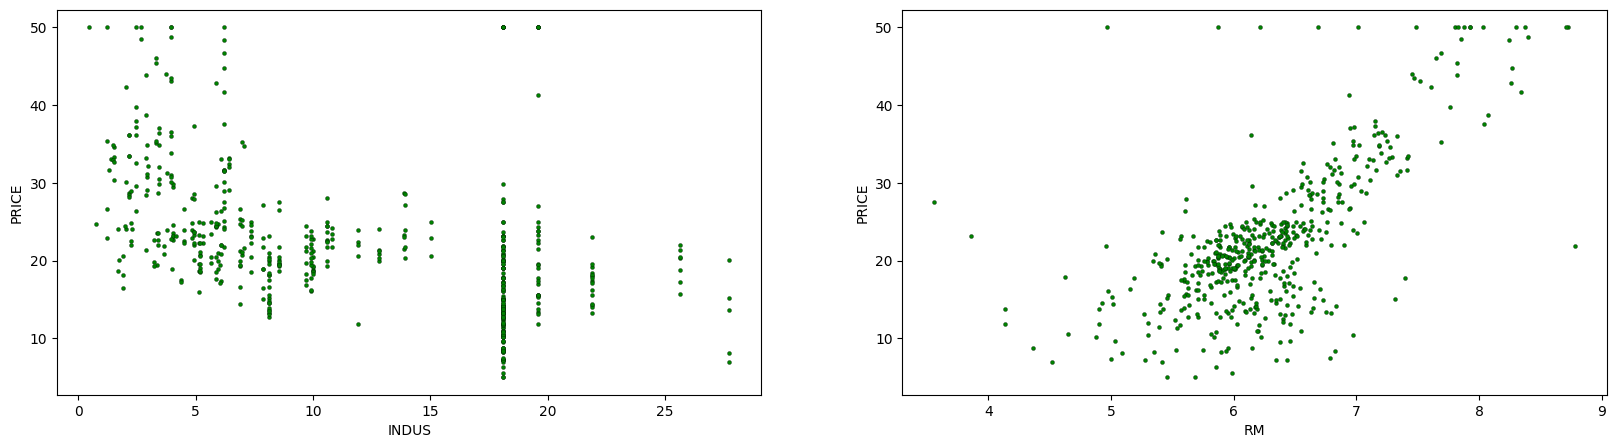

In [2]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs = axs.ravel()

for i, axis in enumerate(axs):
    axs[i].scatter(X[:, i], y, marker=".", s=34.0, c='g', edgecolors='k', linewidths=0.2)
    axs[i].set_xlabel('INDUS' if i == 0 else 'RM')
    axs[i].set_ylabel('PRICE')

3. Use your implementation of the regression model with the normal equation (RegressionModelNormalEquation) and report:

* The values for $\beta$. 

* The cost.

* The predicted value for an instance with values for INDUS and TAX equals to 2.31 and 6.575, respectively.


In [3]:
import importlib
import MachineLearningModel

importlib.reload(MachineLearningModel)

from MachineLearningModel import RegressionModelNormalEquation

model = RegressionModelNormalEquation(degree=1)

model.fit(X, y)
cost = model.evaluate(X, y)
input_values = np.array([[2.31, 6.575]])
prediction = model.predict(input_values)

print(
    f"β1 = {round(model.theta[0], 2)}\n"
    f"β2 = {round(model.theta[1], 2)}\n"
    f"β3 = {round(model.theta[2], 2)}\n"
    f"MSE = {round(cost, 2)}\n"
    f"Prediction for INDUS = 2.31 and RM = 6.575 is {round(prediction[0], 2)}"
)

β1 = -22.9
β2 = -0.33
β3 = 7.82
MSE = 39.15
Prediction for INDUS = 2.31 and RM = 6.575 is 27.76


4. Now, normalize the input features, run the regression model with the normal equation, and report the same items. 
The predicted values for this experiment should be the same, but the $\beta$ values change. Why?

Normalization alters the value space of the x-axis for both input features, while leaving the y-axis value space unchanged. As a result, there is a need for adjustment of $\beta$ values to make up for the change in the input values.

Let's break down the impact of normalization on each feature:

1. **INDUS:** The original INDUS values are distributed quite evenly, resulting in a smaller data variance. These values are also significantly larger than those representing standard deviation. As a result, the graph of the normalized dataset is narrower and centered further to the left on the x-axis compared to the original dataset. This requires a decrease in $\beta2$ to meet the requirement for a more steep slope, and a slight decrease in $\beta1$ to vertically align the line with the dataset.

2. **RM:** The original RM values are densely placed with a few notiecable outliers, resulting in a larger data variance than in the INDUS case. The RM values are also quite close to those representing standard deviation. As a result, the graph of the normalized dataset is wider and centered at a much further to the left on the x-axis compared to the original dataset. This requires a slight decrease in $\beta2$ to meet the requirement for a less steep slope, and a significant increase in $\beta1$ to vertically align the line with the dataset.

**Note:** The two plots below visually prove the statements above by demonstrating the differences between normalized and non-normalized datasets.


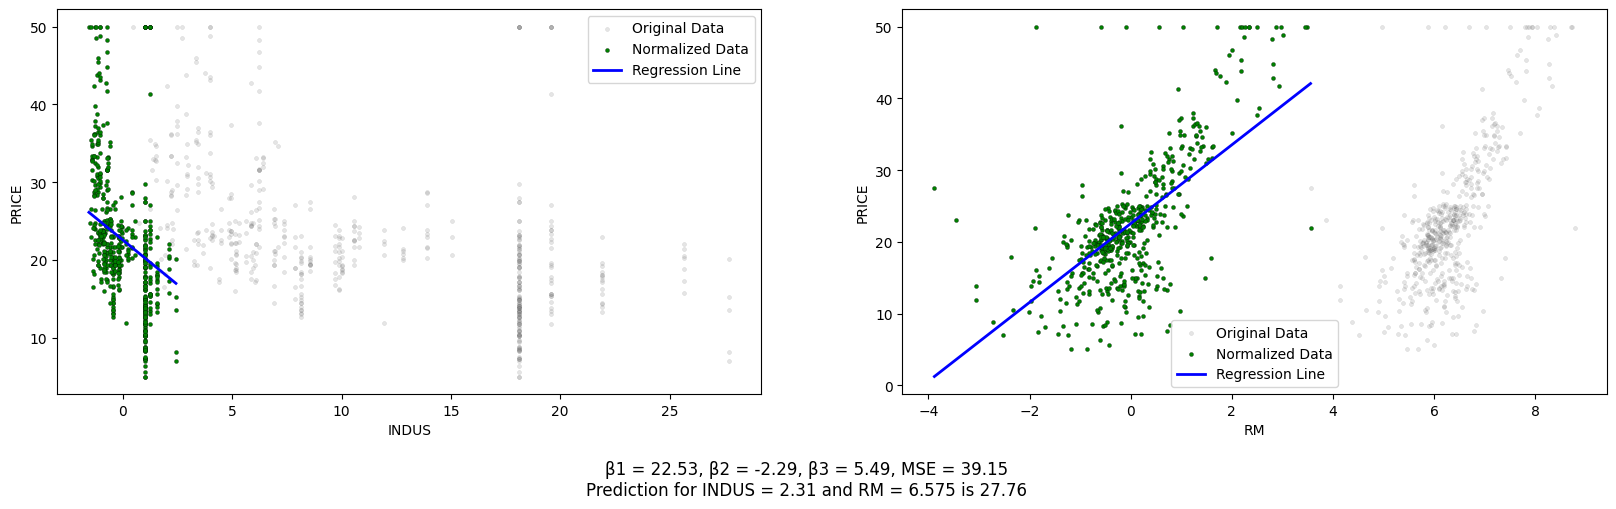

In [4]:
importlib.reload(MachineLearningModel)
from MachineLearningModel import RegressionModelNormalEquation

def predict(model, input_values, normalize=True):
    if normalize:
        input_values = (input_values - model.mean) / model.std
    prediction = model.predict(input_values)
    return prediction

model = RegressionModelNormalEquation(degree=1)

X_normalized = model.normalize(X)
model.fit(X_normalized, y)
cost = model.evaluate(X_normalized, y)

input_values = np.array([[2.31, 6.575]])
prediction = predict(model, input_values, normalize=True)

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

for i, feature in enumerate(['INDUS', 'RM']):
    axs[i].scatter(X[:, i], y, marker=".", s=34.0, c='gray', edgecolors='k', linewidths=0.2, alpha=0.2, label='Original Data')
    axs[i].scatter(X_normalized[:, i], y, marker=".", s=34.0, c='g', edgecolors='k', linewidths=0.2, label='Normalized Data')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('PRICE')
    
    x_vals = np.linspace(min(X_normalized[:, i]), max(X_normalized[:, i]), 100)
    y_vals = model.theta[0] + model.theta[i + 1] * x_vals
    axs[i].plot(x_vals, y_vals, color='blue', linewidth=2, label='Regression Line')
    axs[i].legend()

textstr = (
    f"β1 = {round(model.theta[0], 2)}, β2 = {round(model.theta[1], 2)}, β3 = {round(model.theta[2], 2)}, MSE = {round(cost, 2)}\n"
    f"Prediction for INDUS = 2.31 and RM = 6.575 is {round(prediction[0], 2)}"
)

plt.gcf().text(0.5, -0.1, textstr, fontsize=12, verticalalignment='bottom', horizontalalignment='center')
plt.show()


5. Now, you will work with your implementation of the gradient descent for any degree polynomial. In this part, you must compare how the cost function evolves by using your model using a non-normalized and a normalized instance of your RegressionModelGradientDescen class. 
    * You must plot two figures (e.g., use subplots) side by side to show how the cost evolves over 3000 iterations with a learning rate of $0.001$ using and not using feature normalization. 
    * Describe what is happening and why this happens (i.e., using or not normalization).        
    

### My answer

Non-normalized input features exist on different scales, leading to several issues:

1. **Incorrect Plots**: Input features share the same intercept. Without normalization, individual plots get a regression line with the right slope, but the wrong intercept.
2. **Inconsistent Regression**: When features have large value ranges, more iterations are needed for the regression to converge because the gradients turn minuscule when approaching the minimum. Normalization reduces data variance, resulting in more effective gradients.
3. **Numerical Instability & Precision Issues**: Larger feature magnitudes lead to larger gradients, requiring smaller learning rates for numerical stability and precision. Normalization ensures more consistent learning rates across different datasets.

Using the Boston Housing dataset, I conducted two tests with different learning rates: 0.001 and 0.00001 (100 times smaller). Here are my findings:

- **Learning Rate of 0.001**: The non-normalized dataset caused overflow issues during calculations, resulting in NaN values for all coefficients and the error metric.
- **Learning Rate of 0.00001**: Not normalizing the dataset led to incorrect intercepts in individual plots and higher error rates. The non-normalized dataset quickly approached its final coefficient values within the first few iterations. However, it required approximately 80,000 iterations to converge, whereas the normalized dataset converged as early as the 10th iteration.

In [5]:
importlib.reload(MachineLearningModel)
from MachineLearningModel import RegressionModelGradientDescent

def train_and_evaluate_model(X, y, type="gd", degree=1, learning_rate=0.001, num_iterations=3000, normalize=False):
    # ne – Normal Equation
    # gd – Gradient Descent
    if type not in ["ne", "gd"]:
        raise ValueError("type must be either 'ne' (normal equation) or 'gd' (gradient descent)")
    
    if type == "gd":
        model = RegressionModelGradientDescent(degree=degree, learning_rate=learning_rate, num_iterations=num_iterations)
    elif type == "ne":
        model = RegressionModelNormalEquation(degree=degree)
    
    if normalize:
        X = model.normalize(X)
    
    model.fit(X, y)
    cost = model.evaluate(X, y)

    # Check for NaN or inf values in the model parameters or cost
    if np.isnan(model.theta).any() or np.isinf(model.theta).any() or np.isnan(cost) or np.isinf(cost):
        raise FloatingPointError("NaN or inf encountered in model parameters or cost")

    return model, cost, X

def plot_cost_history(ax, cost_history, title, color, textstr):
    ax.plot(range(len(cost_history)), cost_history, color=color, label="Cost History")
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Cost')
    ax.set_title(title)
    ax.legend()
    ax.text(0.5, 0.5, textstr, transform=ax.transAxes, fontsize=12, 
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"),
            verticalalignment='bottom', horizontalalignment='left')

def plot_feature_relationships(ax, X, y, model, feature_index, feature_name, scatter_color, line_color, label):
    ax.scatter(X[:, feature_index], y, marker=".", s=34.0, c=scatter_color, edgecolors='k', linewidths=0.2, label=label)
    x_vals = np.linspace(min(X[:, feature_index]), max(X[:, feature_index]), 100)
    X_poly = model._polynomial_features(x_vals.reshape(-1, 1))
    y_vals = X_poly @ model.theta[[0] + [j for j in range(feature_index + 1, len(model.theta), len(X_poly))]]
    ax.plot(x_vals, y_vals, color=line_color, linewidth=2, label='Regression Line')
    ax.set_xlabel(feature_name)
    ax.set_ylabel('PRICE')
    ax.legend()

def generate_textstr(title, model, cost, input_values, prediction, learning_rate=None, iterations=None):
    textstr = (
        f"{title}\n\n"
        f"β1 = {round(model.theta[0], 2)}\n"
        f"β2 = {round(model.theta[1], 2)}\n"
        f"β3 = {round(model.theta[2], 2)}\n"
        f"MSE = {round(cost, 4)}\n\n"
        f"Prediction:\n {input_values[0]} –> {round(prediction[0], 2)}"
    )
    if learning_rate is not None and iterations is not None:
        textstr += (
            f"\n\nLearning Rate = {learning_rate}\n"
            f"Iterations = {iterations}"
        )
    return textstr

def main_execution():
    try:
        with np.errstate(over='raise', invalid='raise'):
            # learning_rate=0.00001 is the minimum value non-normalized model doesn't overflow at with degree=1 (default)
            model_non_normalized, cost_non_normalized, X_non_normalized = train_and_evaluate_model(X, y, normalize=False, type="gd")
            model_normalized, cost_normalized, X_normalized = train_and_evaluate_model(X, y, normalize=True, type="gd")

            input_values = np.array([[2.31, 6.575]])
            prediction_normalized = predict(model_normalized, input_values, normalize=True)
            prediction_non_normalized = predict(model_non_normalized, input_values, normalize=False)

            # Text for non-normalized model
            textstr_non_normalized = generate_textstr(
                "Non-Normalized Model", 
                model_non_normalized, 
                cost_non_normalized, 
                input_values, 
                prediction_non_normalized
            )

            # Text for normalized model
            textstr_normalized = generate_textstr(
                "Normalized Model", 
                model_normalized, 
                cost_normalized, 
                input_values, 
                prediction_normalized
            )

            # Plotting the cost function evolution
            fig, axs = plt.subplots(3, 2, figsize=(15, 15))
            plot_cost_history(axs[0, 0], model_non_normalized.cost_history,  'Function Cost History (Non-Normalized)', 'red', textstr_non_normalized)
            plot_cost_history(axs[0, 1], model_normalized.cost_history, 'Function Cost History (Normalized)', 'blue', textstr_normalized)

            # Plotting relationships between individual features and labels with regression lines
            features = ['INDUS', 'RM']
            for i, feature in enumerate(features):
                # Non-normalized data
                plot_feature_relationships(axs[i + 1, 0], X_non_normalized, y, model_non_normalized, i, feature, 'g', 'red', 'Original Data')
                axs[i + 1, 0].set_title(f'Relationship between {feature} and PRICE (Non-Normalized)')

                # Normalized data
                plot_feature_relationships(axs[i + 1, 1], X_normalized, y, model_normalized, i, feature, 'g', 'blue', 'Normalized Data')
                axs[i + 1, 1].set_title(f'Relationship between {feature} and PRICE (Normalized)')

            plt.tight_layout()
            plt.show()
    except FloatingPointError as e:
        print(f"FloatingPointError encountered: {e}")
    except RuntimeWarning as e:
        print(f"RuntimeWarning encountered: {e}")

main_execution()

FloatingPointError encountered: overflow encountered in reduce


6. Finally, find and plot a figure with the hyperparameter's learning rate and the number of iterations (using the normalized version) such that you get within a difference of 1\% of the final cost for the normal equation using this dataset.

We will plot the convergence rates for various combinations of learning rates and iteration numbers.
The convergence rates will be categorized into four groups:
1. Difference > 1%
2. Difference < 1%
3. Difference < 0.01%
4. Difference < 0.000000001% (effectively zero)

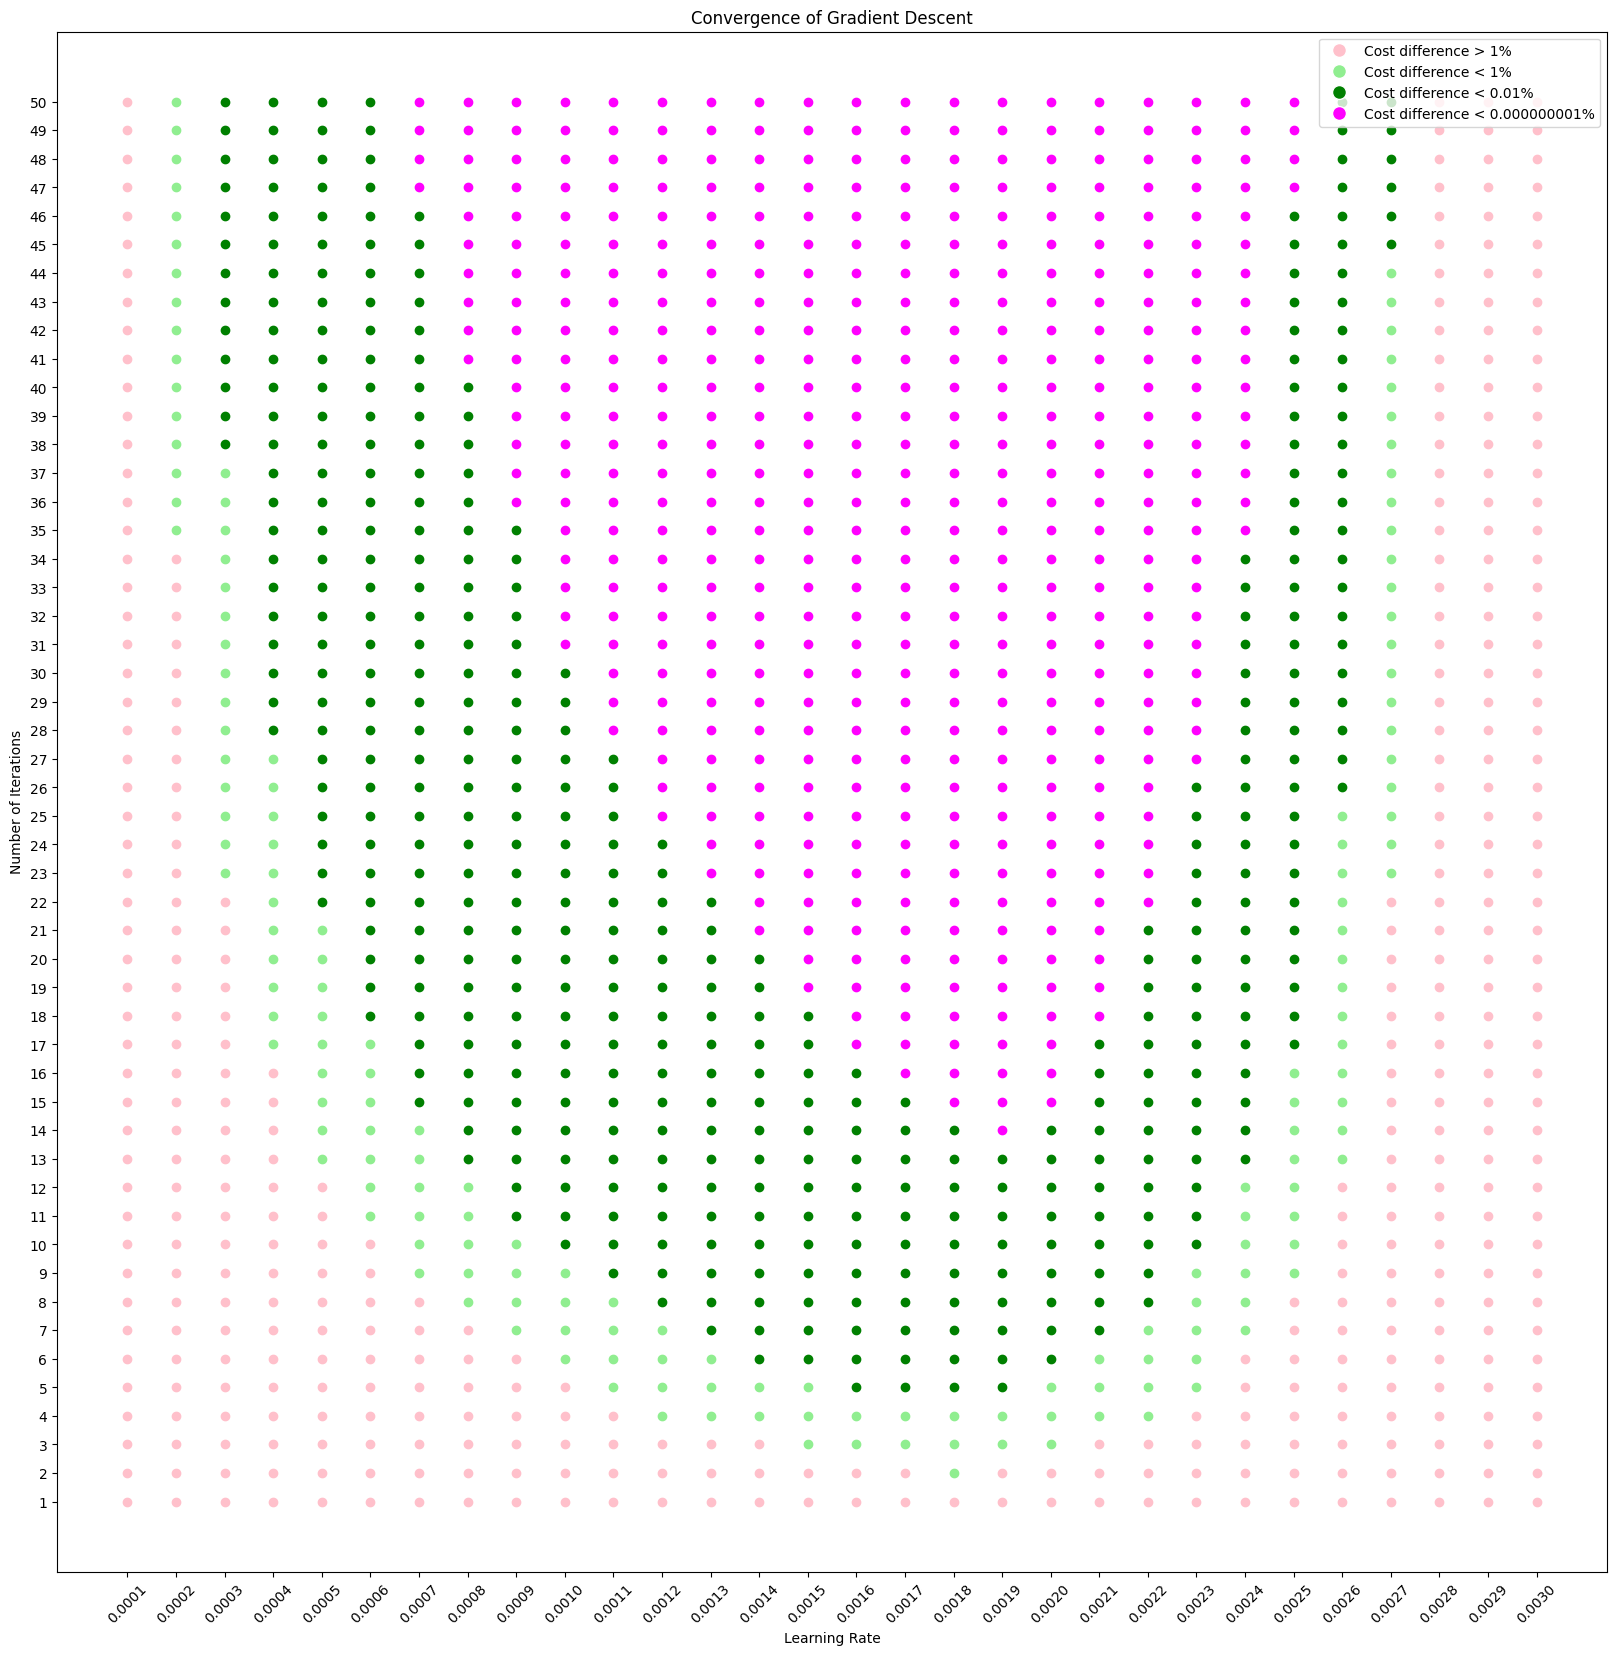

In [6]:
def main_execution(learning_rate=0.001, num_iterations=10, degree=1):
    try:
        with np.errstate(over='raise', invalid='raise'):
            model, cost, X_normalized = train_and_evaluate_model(X, y, type="gd", normalize=True, learning_rate=learning_rate, num_iterations=num_iterations)
            input_values = np.array([[2.31, 6.575]])
            prediction = predict(model, input_values)
            model_normal_eq, cost_normal_eq, _ = train_and_evaluate_model(X, y, type="ne", normalize=True)
            cost_difference = abs(cost - cost_normal_eq) / cost_normal_eq
            return cost_difference
    except FloatingPointError as e:
        print(f"FloatingPointError encountered: {e}")
    except RuntimeWarning as e:
        print(f"RuntimeWarning encountered: {e}")

def display_text(ax, textstr, textstr_normal_eq, textstr_difference):
    ax.axis('off')
    ax.text(0, 0.42, textstr, fontsize=12, verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))
    ax.text(0.8, 0.5, textstr_normal_eq, fontsize=12, verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))
    ax.text(0.8, 0.15, textstr_difference, fontsize=12, verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

learning_rate = 0.0001
num_iterations = 1
results = []

while True:
    cost_difference = main_execution(learning_rate=learning_rate, num_iterations=num_iterations)
    color = 'magenta' if cost_difference < 0.00000000001 else 'green' if cost_difference < 0.0001 else 'lightgreen' if cost_difference <= 0.01 else 'pink'
    results.append((learning_rate, num_iterations, color))
    
    num_iterations += 1
    if num_iterations > 50.0:
        num_iterations = 1
        learning_rate += 0.0001
    if learning_rate >= 0.003:
        break


fig, ax = plt.subplots(figsize=(20, 20))
learning_rates = sorted(set(lr for lr, _, _ in results))
iterations = sorted(set(iters for _, iters, _ in results))

for lr, iters, color in results:
    ax.scatter(learning_rates.index(lr), iterations.index(iters), color=color)

red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='pink', markersize=10, label='Cost difference > 1%')
lightgreen_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen', markersize=10, label='Cost difference < 1%')
green_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Cost difference < 0.01%')
magenta_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='magenta', markersize=10, label='Cost difference < 0.000000001%')
ax.legend(handles=[red_patch, lightgreen_patch, green_patch, magenta_patch])

ax.set_xticks(range(len(learning_rates)))
ax.set_xticklabels([f"{lr:.4f}" for lr in learning_rates], rotation=45)
ax.set_yticks(range(len(iterations)))
ax.set_yticklabels(iterations)
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Number of Iterations')
ax.set_title('Convergence of Gradient Descent')
plt.show()

To achieve a 1% difference in costs, a suitable combination is:
- Number of iterations: 2
- Learning rate: 0.0018

For a more conservative approach, aiming for a cost difference as low as 0.01%, use:
- Number of iterations: 5
- Learning rate: between 0.0016 and 0.0019 (inclusive)

For an extremely conservative approach, targeting an effectively 0 difference, use:
- Number of iterations: 14
- Learning rate: 0.0019

Below, you can see visualizations of the cost history, resulting Mean Squared Error (MSE), coefficients, and predictions for the three combinations.

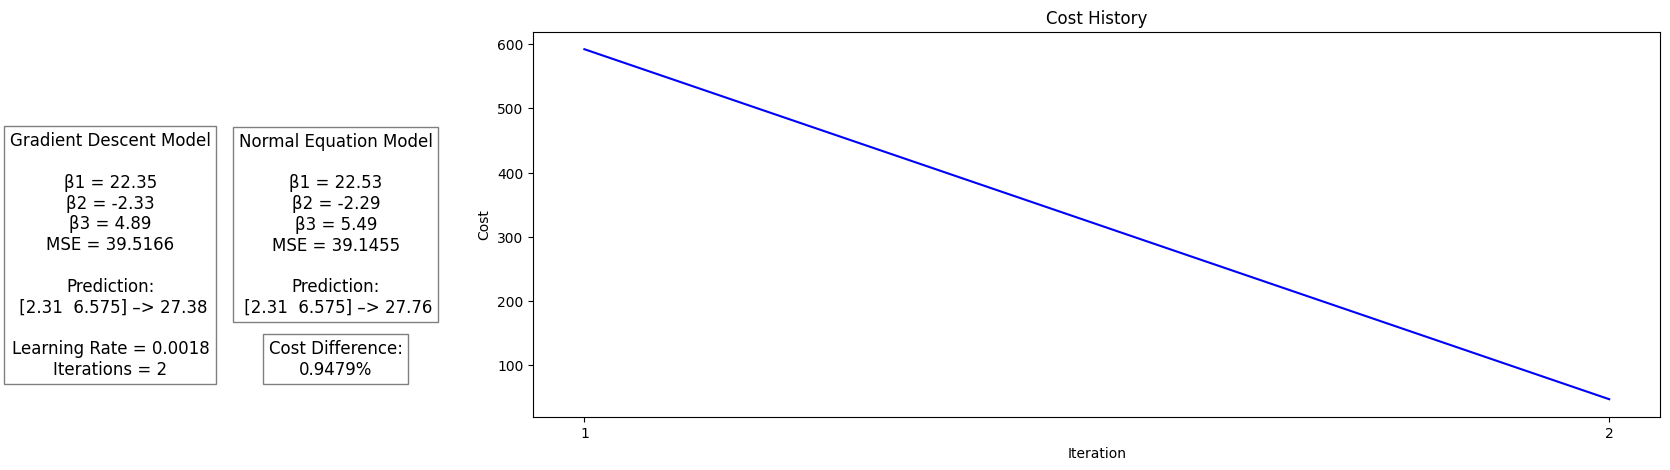

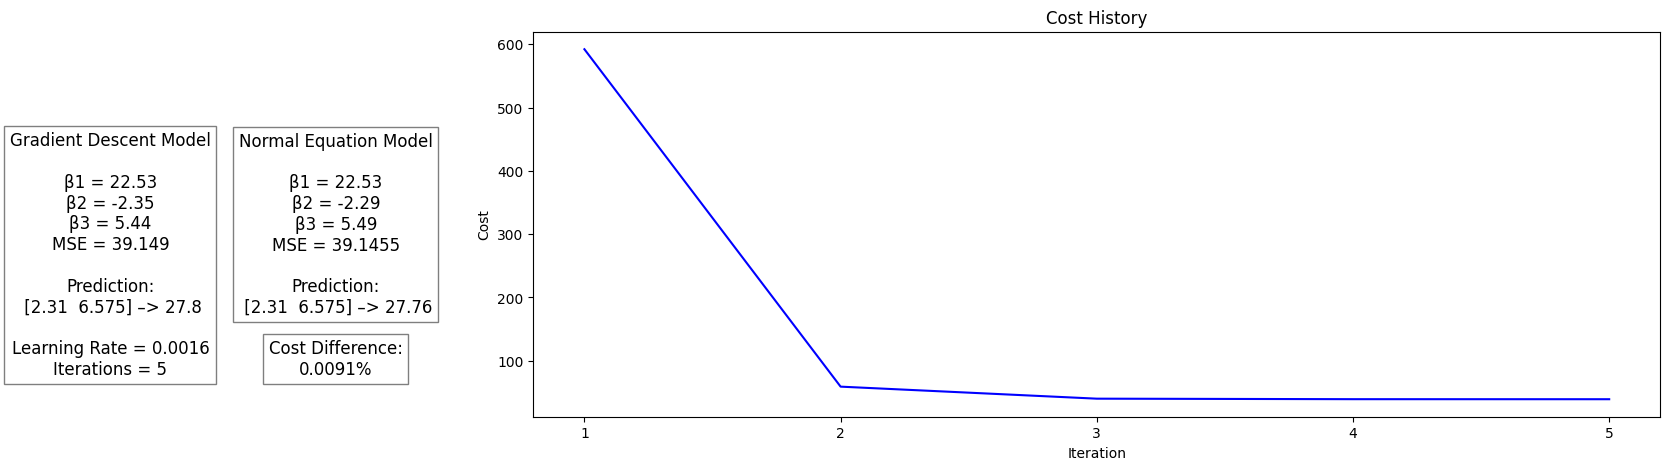

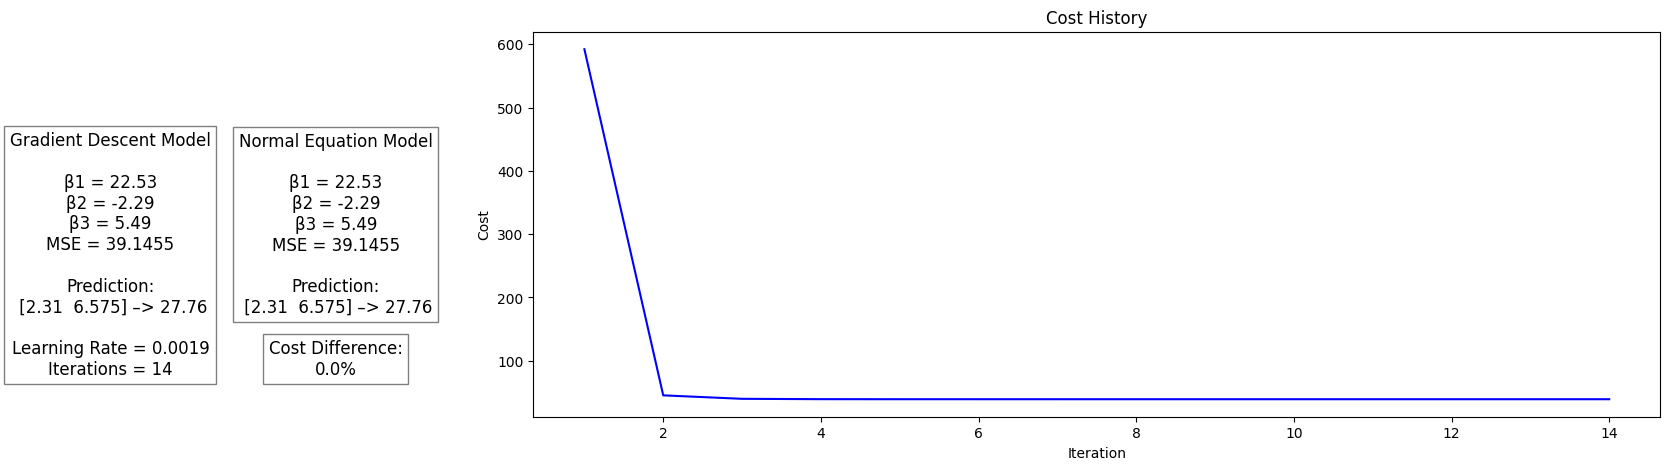

In [7]:
model_normal_eq, cost_normal_eq, _ = train_and_evaluate_model(X, y, type="ne", normalize=True)
cost_difference = abs(cost - cost_normal_eq) / cost_normal_eq

learning_rates_arr = [0.0018, 0.0016, 0.0019]
num_iterations_arr = [2, 5, 14]
input_values = np.array([[2.31, 6.575]])

for i in range(len(num_iterations_arr)):
    model, cost, X_normalized = train_and_evaluate_model(X, y, type="gd", normalize=True, learning_rate=learning_rates_arr[i], num_iterations=num_iterations_arr[i])

    fig, ax = plt.subplots(1, 2, figsize=(20, 5), gridspec_kw={'width_ratios': [1, 4]})

    textstr = generate_textstr(
        "Gradient Descent Model",
        model,
        cost,
        input_values,
        predict(model, input_values),
        learning_rate=learning_rates_arr[i],
        iterations=num_iterations_arr[i]
    )

    textstr_normal_eq = generate_textstr(
        "Normal Equation Model",
        model_normal_eq,
        cost_normal_eq,
        input_values,
        predict(model_normal_eq, input_values)
    )

    cost_difference = abs(cost - cost_normal_eq) / cost_normal_eq

    textstr_difference = (
        f"Cost Difference:\n"
        f"{round(cost_difference * 100, 4)}%"
    )

    # Display the text in the left box
    ax[0].axis('off')
    ax[0].text(0, 0.42, textstr, fontsize=12, verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))
    ax[0].text(0.8, 0.5, textstr_normal_eq, fontsize=12, verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))
    ax[0].text(0.8, 0.15, textstr_difference, fontsize=12, verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

    # Plot the cost history in the right plot
    ax[1].plot(range(1, len(model.cost_history) + 1), model.cost_history, 'blue')
    ax[1].set_title('Cost History')
    ax[1].set_xlabel('Iteration')
    ax[1].set_ylabel('Cost')
    ax[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    plt.show()